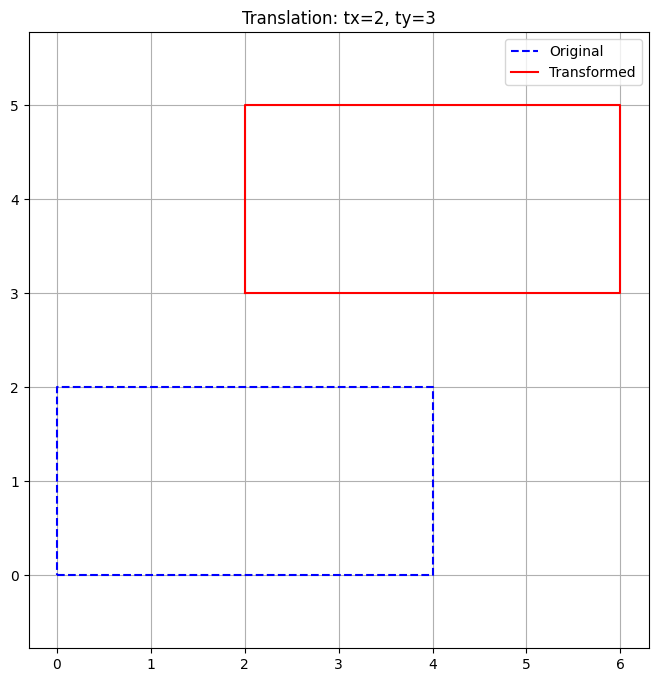

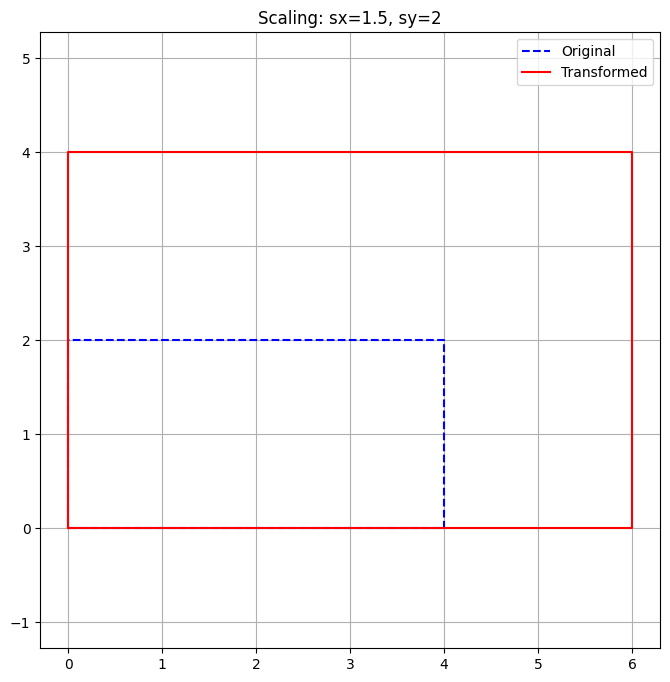

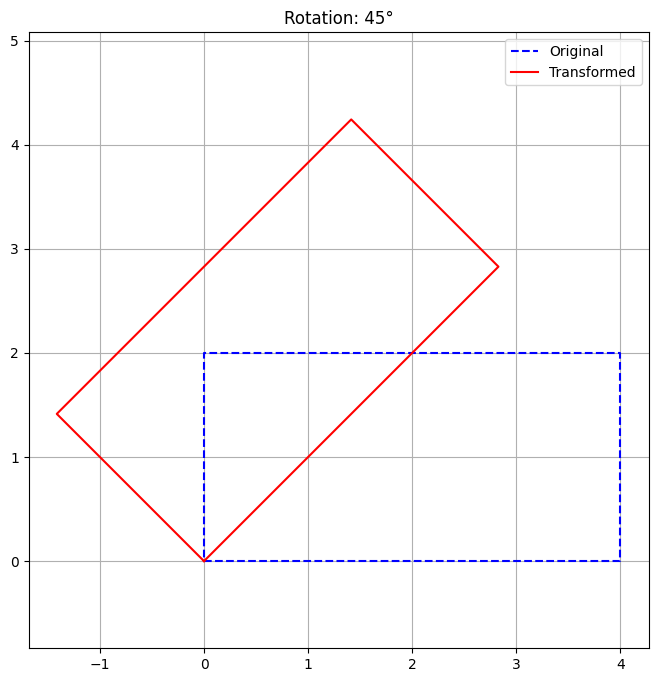

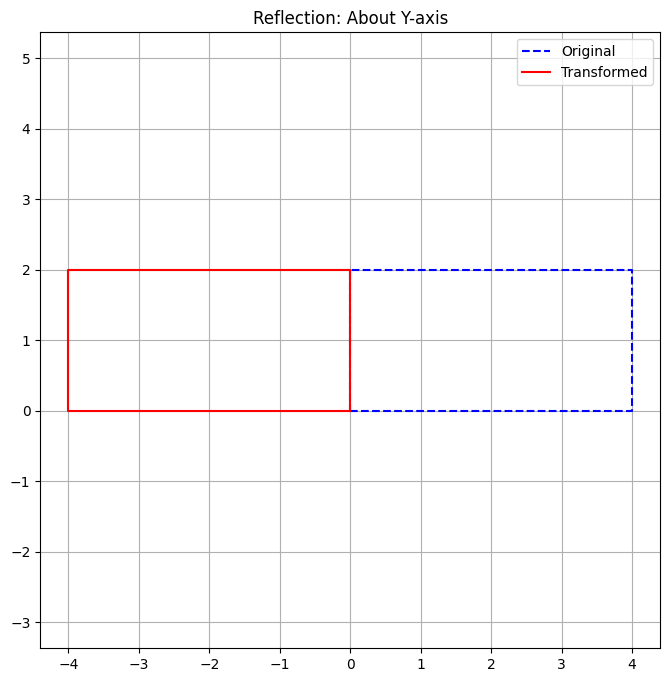

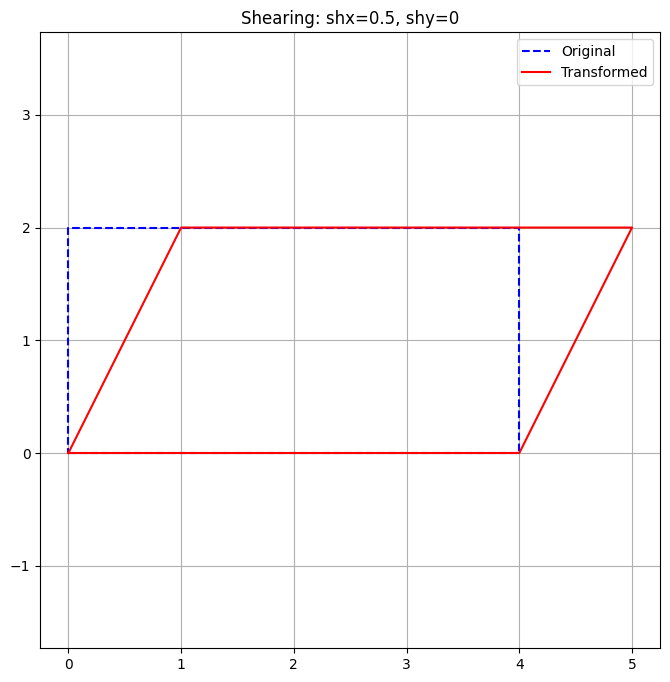

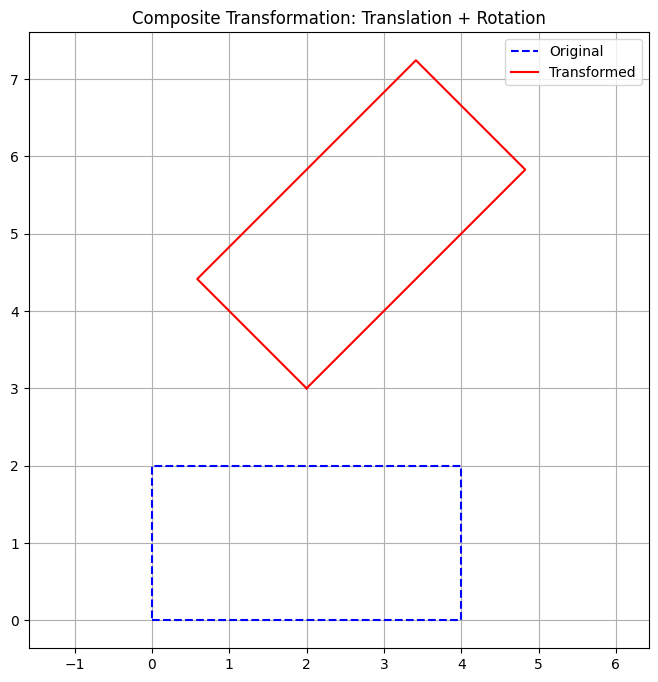

In [ ]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt

# Function to plot the original and transformed shapes
def plot_shapes(original, transformed, title, color1="blue", color2="red"):
    original = np.vstack([original, original[0]])  # Close the shape
    transformed = np.vstack([transformed, transformed[0]])  # Close the shape
    plt.figure(figsize=(8, 8))
    plt.plot(original[:, 0], original[:, 1], label="Original", color=color1, linestyle="--")
    plt.plot(transformed[:, 0], transformed[:, 1], label="Transformed", color=color2)
    plt.title(title)
    plt.legend()
    plt.axis("equal")
    plt.grid(True)
    plt.show()

# 2D Translation
def translate(points, tx, ty):
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    points_h = np.hstack([points, np.ones((points.shape[0], 1))])  # Homogeneous coordinates
    return (translation_matrix @ points_h.T).T[:, :2]

# 2D Scaling
def scale(points, sx, sy):
    scaling_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    points_h = np.hstack([points, np.ones((points.shape[0], 1))])  # Homogeneous coordinates
    return (scaling_matrix @ points_h.T).T[:, :2]

# 2D Rotation
def rotate(points, angle):
    rad = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(rad), -np.sin(rad), 0],
        [np.sin(rad), np.cos(rad), 0],
        [0, 0, 1]
    ])
    points_h = np.hstack([points, np.ones((points.shape[0], 1))])  # Homogeneous coordinates
    return (rotation_matrix @ points_h.T).T[:, :2]

# 2D Reflection
def reflect(points, axis="x"):
    if axis == "x":
        reflection_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == "y":
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    elif axis == "origin":
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    else:
        raise ValueError("Invalid axis. Choose 'x', 'y', or 'origin'.")
    points_h = np.hstack([points, np.ones((points.shape[0], 1))])  # Homogeneous coordinates
    return (reflection_matrix @ points_h.T).T[:, :2]

# 2D Shearing
def shear(points, shx=0, shy=0):
    shearing_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    points_h = np.hstack([points, np.ones((points.shape[0], 1))])  # Homogeneous coordinates
    return (shearing_matrix @ points_h.T).T[:, :2]

# Composite Transformation
def composite_transform(points, transformations):
    result = np.hstack([points, np.ones((points.shape[0], 1))])  # Homogeneous coordinates
    composite_matrix = np.eye(3)
    for transformation in transformations:
        composite_matrix = composite_matrix @ transformation
    return (composite_matrix @ result.T).T[:, :2]

# Main code
if __name__ == "__main__":
    # Define a 2D object (a rectangle)
    rectangle = np.array([
        [0, 0],
        [4, 0],
        [4, 2],
        [0, 2]
    ])

    # Translation example
    translated = translate(rectangle, tx=2, ty=3)
    plot_shapes(rectangle, translated, "Translation: tx=2, ty=3")

    # Scaling example
    scaled = scale(rectangle, sx=1.5, sy=2)
    plot_shapes(rectangle, scaled, "Scaling: sx=1.5, sy=2")

    # Rotation example
    rotated = rotate(rectangle, angle=45)
    plot_shapes(rectangle, rotated, "Rotation: 45°")

    # Reflection example
    reflected = reflect(rectangle, axis="y")
    plot_shapes(rectangle, reflected, "Reflection: About Y-axis")

    # Shearing example
    sheared = shear(rectangle, shx=0.5, shy=0)
    plot_shapes(rectangle, sheared, "Shearing: shx=0.5, shy=0")

    # Composite transformation example (Translation + Rotation)
    translation_matrix = np.array([
        [1, 0, 2],
        [0, 1, 3],
        [0, 0, 1]
    ])
    rotation_matrix = np.array([
        [np.cos(np.radians(45)), -np.sin(np.radians(45)), 0],
        [np.sin(np.radians(45)), np.cos(np.radians(45)), 0],
        [0, 0, 1]
    ])
    composite = composite_transform(rectangle, [translation_matrix, rotation_matrix])
    plot_shapes(rectangle, composite, "Composite Transformation: Translation + Rotation")


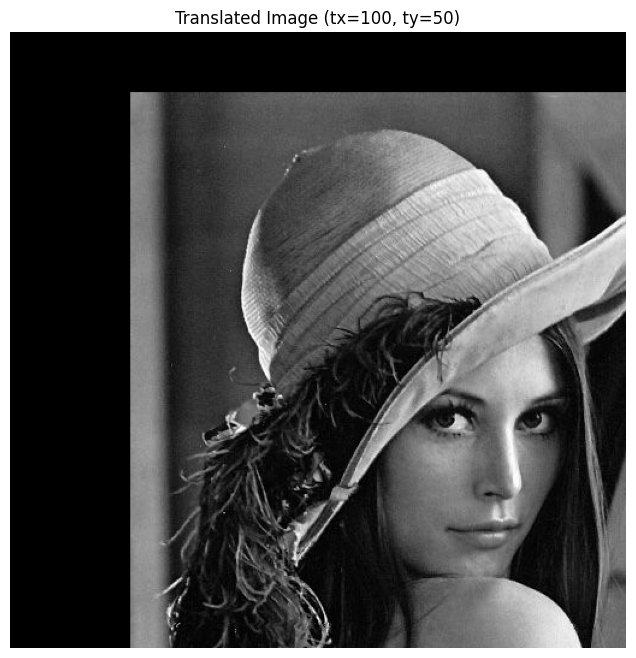

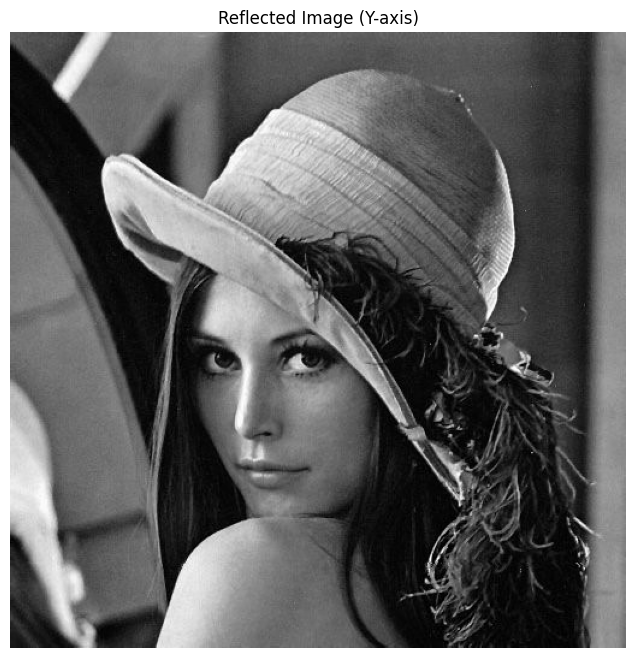

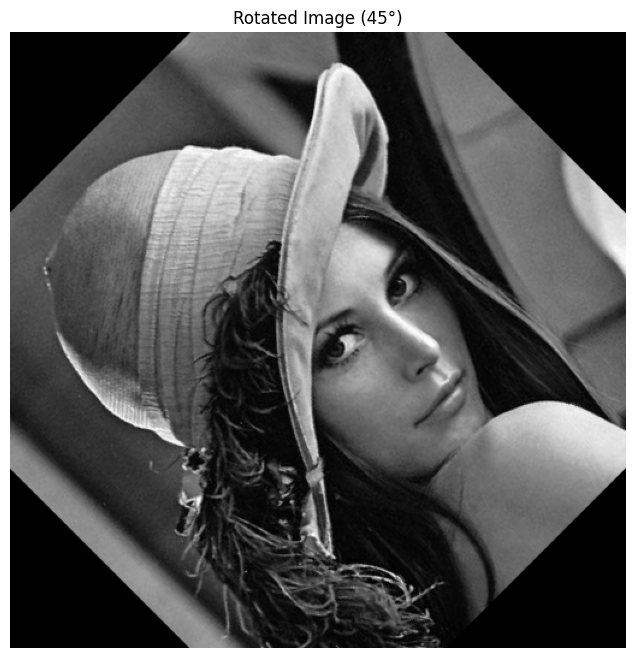

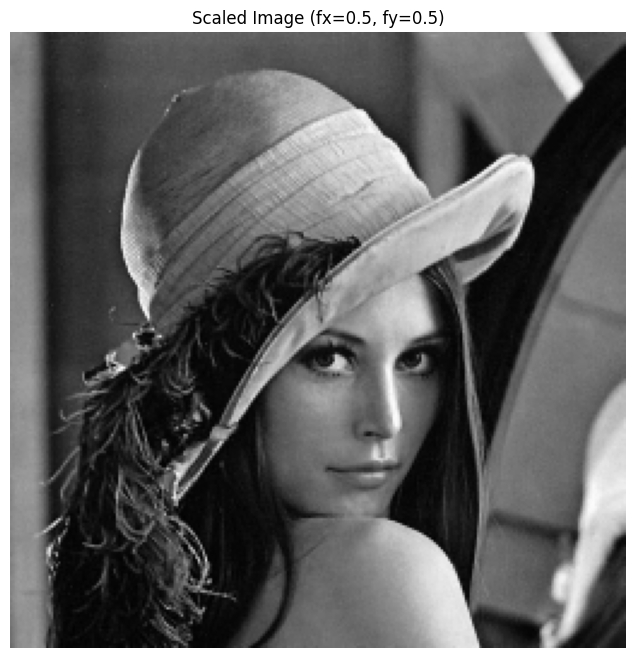

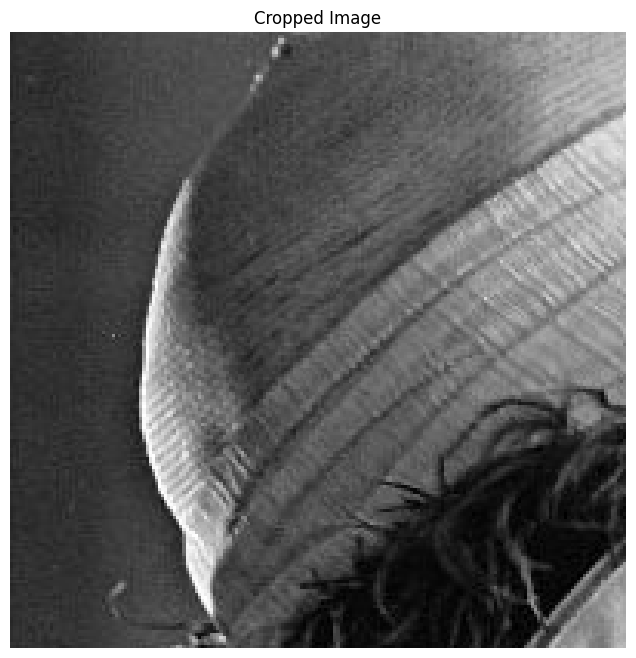

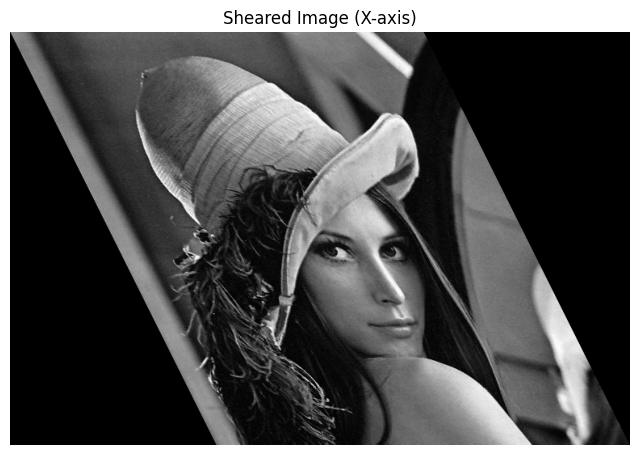

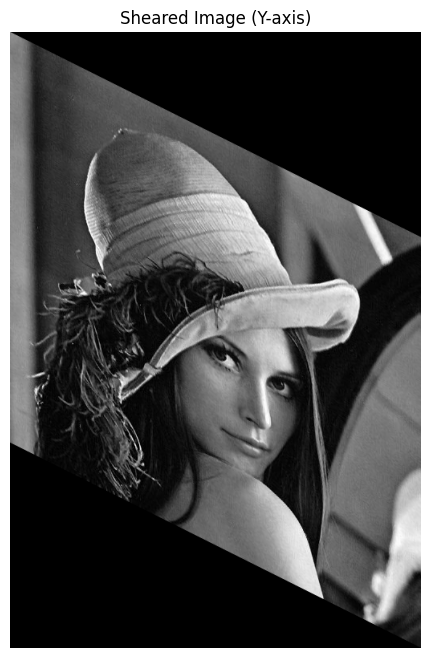

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Helper function to display images
def display_image(image, title="Image"):
    plt.figure(figsize=(8, 8))
    if len(image.shape) == 3:  # Color image
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else:  # Grayscale image
        plt.imshow(image, cmap="gray")
    plt.title(title)
    plt.axis("off")
    plt.show()

# Load the image (replace 'image.jpg' with your image file name)
image_path = "/content/WhatsApp Image 2025-01-17 at 09.42.24_d156fa18.jpg"  # Replace with the path to your image
image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError("Image not found. Ensure the path is correct.")

# 1. Image Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated_img = cv2.warpAffine(img, translation_matrix, (cols, rows))
    return translated_img

translated_image = translate_image(image, tx=100, ty=50)
display_image(translated_image, "Translated Image (tx=100, ty=50)")

# 2. Reflection
def reflect_image(img, axis="x"):
    if axis == "x":
        reflected_img = cv2.flip(img, 0)
    elif axis == "y":
        reflected_img = cv2.flip(img, 1)
    elif axis == "both":
        reflected_img = cv2.flip(img, -1)
    else:
        raise ValueError("Invalid axis. Choose 'x', 'y', or 'both'.")
    return reflected_img

reflected_image = reflect_image(image, axis="y")
display_image(reflected_image, "Reflected Image (Y-axis)")

# 3. Rotation
def rotate_image(img, angle, scale=1.0):
    rows, cols = img.shape[:2]
    center = (cols // 2, rows // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
    rotated_img = cv2.warpAffine(img, rotation_matrix, (cols, rows))
    return rotated_img

rotated_image = rotate_image(image, angle=45)
display_image(rotated_image, "Rotated Image (45°)")

# 4. Scaling
def scale_image(img, fx, fy):
    scaled_img = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled_img

scaled_image = scale_image(image, fx=0.5, fy=0.5)
display_image(scaled_image, "Scaled Image (fx=0.5, fy=0.5)")

# 5. Cropping
def crop_image(img, x_start, y_start, width, height):
    cropped_img = img[y_start:y_start+height, x_start:x_start+width]
    return cropped_img

cropped_image = crop_image(image, x_start=50, y_start=50, width=200, height=200)
display_image(cropped_image, "Cropped Image")

# 6. Shearing in X-axis
def shear_image_x(img, shear_factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, shear_factor, 0], [0, 1, 0]])
    sheared_img = cv2.warpAffine(img, shear_matrix, (cols + int(rows * shear_factor), rows))
    return sheared_img

sheared_image_x = shear_image_x(image, shear_factor=0.5)
display_image(sheared_image_x, "Sheared Image (X-axis)")

# 7. Shearing in Y-axis
def shear_image_y(img, shear_factor):
    rows, cols = img.shape[:2]
    shear_matrix = np.float32([[1, 0, 0], [shear_factor, 1, 0]])
    sheared_img = cv2.warpAffine(img, shear_matrix, (cols, rows + int(cols * shear_factor)))
    return sheared_img

sheared_image_y = shear_image_y(image, shear_factor=0.5)
display_image(sheared_image_y, "Sheared Image (Y-axis)")